<a href="https://colab.research.google.com/github/MiamiCrypto/Sports-Analytics-/blob/main/WBB_2024_25_Season.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏀 Miami Dade College Women's Basketball – 2024–25 Season Stats Analysis

This notebook presents a data-driven analysis of the 2024–25 season statistics for the Miami Dade College Women's Basketball team. The dataset includes individual player performance metrics across scoring, shooting efficiency, rebounding, playmaking, and defensive categories.

The goal is to extract insights that highlight player impact, identify strengths and weaknesses, and support strategic decisions through visualization and statistical modeling.

# 🟠 Offensive Analysis
## Points, FG%, 3PT%, Assists, Turnovers

# 🔵 Defensive Impact
## Steals, Blocks, Fouls

# 🟢 Rebounding Breakdown
## Offensive, Defensive, Total

# ⚙️ Efficiency Insights & Strategy
## Underused talents, playmaking risks, coaching recommendations

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URLs for datasets
stats_url = "https://raw.githubusercontent.com/MiamiCrypto/Sports-Analytics-/refs/heads/main/mdc_wbb/PlayerSeasonStats%202024_25.csv"
roster_url = "https://raw.githubusercontent.com/MiamiCrypto/Sports-Analytics-/refs/heads/main/mdc_wbb/mdc_roster_2024_25.csv"

# Load data
df = pd.read_csv(stats_url)
roster_df = pd.read_csv(roster_url)

# Preview initial columns
print("Stats Columns:", df.columns.tolist())
print("Roster Columns:", roster_df.columns.tolist())

Stats Columns: ['#', 'Player', 'GP', 'GS', 'MIN', 'AVG_MIN', 'FG', 'FGA', 'FG_PCT', '3FG', '3FGA', 'PCT', 'FT', 'FTA', 'FT_PCT', 'OFFR', 'DEFR', 'TOTR', 'AVGR', 'PFOUL', 'DISQ', 'ASSIST', 'A_G', 'TO', 'TO_G', 'A_TO_RATIO', 'BLK', 'BLK_G', 'STL', 'STL_G', 'PTS', 'AVG_P']
Roster Columns: ['Player', 'class_year', 'position']


In [94]:
# Standardize columns in the stats DataFrame
df.columns = (
    df.columns.str.strip()
    .str.lower()
    .str.replace('/', '_')
    .str.replace('#', 'jersey_number')
)

# Standardize columns in the roster DataFrame
roster_df.columns = roster_df.columns.str.strip().str.lower()

# ✅ Merge using 'player' (now lowercase in both after cleaning)
df = df.merge(roster_df, on='player', how='left')

In [95]:
# Rename columns for clarity and consistency
df = df.rename(columns={
    'player': 'player_name',
    '3fg': 'fg3_made',
    '3fga': 'fg3_attempted',
    'pct': 'fg3_pct',  # this is 3-point percentage
    'to': 'turnovers',
    'a_to_ratio': 'ast_tov_ratio',
    'avg_p': 'points_per_game',
    'a_g': 'assists_per_game',
    'to_g': 'turnovers_per_game',
    'blk_g': 'blocks_per_game',
    'stl_g': 'steals_per_game',
    'avg_min': 'minutes_per_game',
    'avgr': 'rebounds_per_game',
    'fg_pct': 'fg_pct',
    'ft_pct': 'ft_pct'
})

In [96]:
# Check for missing or malformed data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   jersey_number       9 non-null      int64  
 1   player_name         9 non-null      object 
 2   gp                  9 non-null      int64  
 3   gs                  9 non-null      int64  
 4   min                 9 non-null      int64  
 5   minutes_per_game    9 non-null      float64
 6   fg                  9 non-null      int64  
 7   fga                 9 non-null      int64  
 8   fg_pct              9 non-null      float64
 9   fg3_made            9 non-null      int64  
 10  fg3_attempted       9 non-null      int64  
 11  fg3_pct             9 non-null      float64
 12  ft                  9 non-null      int64  
 13  fta                 9 non-null      int64  
 14  ft_pct              9 non-null      float64
 15  offr                9 non-null      int64  
 16  defr        

,jersey_number,gp,gs,min,minutes_per_game,fg,fga,fg_pct,fg3_made,fg3_attempted,...,assists_per_game,turnovers,turnovers_per_game,ast_tov_ratio,blk,blocks_per_game,stl,steals_per_game,pts,points_per_game
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,10.666667,28.111111,16.777778,442.444444,14.855556,107.777778,253.444444,39.066667,22.000000,70.444444,...,1.822222,55.444444,1.866667,0.855556,11.222222,0.388889,37.777778,1.244444,279.666667,9.311111
std,8.514693,3.789606,13.188800,296.381980,9.158618,92.290002,200.683277,8.756569,36.458881,102.703592,...,1.582544,32.738017,1.016120,0.519882,14.686540,0.520683,33.521552,1.044164,236.354606,7.437984
min,0.000000,22.000000,0.000000,50.000000,2.200000,3.000000,15.000000,20.000000,0.000000,0.000000,...,0.100000,7.000000,0.300000,0.300000,0.000000,0.000000,2.000000,0.100000,7.000000,0.300000
25%,2.000000,25.000000,6.000000,210.000000,7.800000,28.000000,64.000000,36.000000,0.000000,3.000000,...,0.400000,36.000000,1.200000,0.400000,1.000000,0.000000,9.000000,0.300000,64.000000,2.100000
50%,12.000000,31.000000,19.000000,485.000000,17.300000,74.000000,173.000000,39.800000,2.000000,14.000000,...,1.500000,55.000000,2.200000,1.000000,6.000000,0.200000,28.000000,1.000000,175.000000,6.300000
75%,15.000000,31.000000,30.000000,723.000000,23.300000,166.000000,461.000000,43.800000,16.000000,76.000000,...,2.800000,84.000000,2.700000,1.000000,11.000000,0.400000,60.000000,1.900000,465.000000,15.000000
max,23.000000,31.000000,31.000000,795.000000,25.600000,241.000000,496.000000,48.600000,98.000000,258.000000,...,4.400000,97.000000,3.100000,1.900000,45.000000,1.600000,91.000000,2.900000,597.000000,19.300000


In [97]:
df[df['class_year'].isnull()][['player_name']]

,player_name


## 🟠 Offensive Production: Points per Game (PPG)

This chart shows each player’s scoring average per game during the 2024–25 season. It highlights key offensive contributors and helps identify whether scoring is concentrated in a few players or distributed more evenly.

Understanding who drives the team’s offense is essential for lineup strategy and shot allocation.

### 📋 Reference Table: Points per Game and Total Points

This table shows total points, minutes, and per-game scoring for each player. It complements the chart and helps identify consistent scorers and per-minute productivity.

In [98]:
# Display sorted PPG table
df[['player_name', 'points_per_game', 'pts', 'min']].sort_values('points_per_game', ascending=False)

,player_name,points_per_game,pts,min
0,Shameir Quimby,19.3,597,795
1,Clearia Peterson,18.1,560,723
2,Kiara Harris,15.0,465,774
3,Jazmyne Bynum,14.6,453,600
4,Michaela Lane,6.3,175,485
5,Jamesha Card,6.0,150,210
6,Abigail Alvarez,2.1,46,104
7,KaMariya Simmons,2.1,64,241
8,Aliana Bass,0.3,7,50


<ipython-input-99-3273a5eaf157>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ppg, x='points_per_game', y='player_name', palette='Oranges_d')


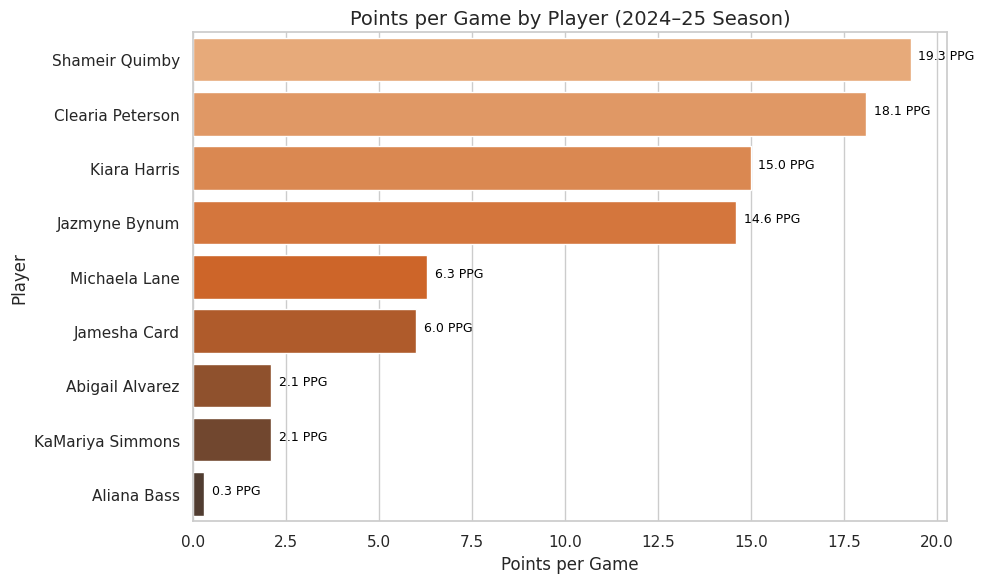

In [99]:
df_ppg = df.sort_values('points_per_game', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_ppg, x='points_per_game', y='player_name', palette='Oranges_d')

# Add labels showing PPG
for i in range(df_ppg.shape[0]):
    plt.text(df_ppg['points_per_game'].iloc[i] + 0.2, i, f"{df_ppg['points_per_game'].iloc[i]} PPG", color='black', fontsize=9)

plt.title("Points per Game by Player (2024–25 Season)", fontsize=14)
plt.xlabel("Points per Game")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

### 📌 Insight:

The scoring output for Miami Dade College in the 2024–25 season is led by:

- **Shameir Quinby** – 19.3 PPG
- **Clearia Peterson** – 18.1 PPG
- **Kiara Harris** – 15.0 PPG

These three players form the offensive core, contributing the majority of the team’s scoring production.

Secondary contributors like **Jazmyne Bynum (14.6 PPG)** and **Michaela Lane (6.3 PPG)** add important support, while role players such as **Jamesha Card**, **Abigail Alvarez**, **KaMariya Simmons**, and **Aliana Bass** provide lower-volume scoring alongside other contributions in rebounds, defense, or efficiency.

This distribution suggests a top-heavy offense that could benefit from tactical plays involving secondary scorers to reduce the load on the primary trio.

## 🟠 Scoring Efficiency: Field Goal Percentage (FG%)

Field goal percentage (FG%) represents how efficiently a player converts shot attempts into points, across all 2-point and 3-point field goals.

This metric is essential for evaluating shooting consistency and decision-making. High FG% at low volume may signal underused scoring options, while low FG% at high volume may suggest a need for improved shot selection.

### 📋 Reference Table: Field Goal Efficiency

This table displays each player's field goals made (FG), attempts (FGA), and field goal percentage (FG%). It supports evaluation of both shot accuracy and volume.

In [100]:
# Show FG% and FGA context
df[['player_name', 'fg_pct', 'fg', 'fga']].sort_values('fg_pct', ascending=False)

,player_name,fg_pct,fg,fga
0,Shameir Quimby,48.6,241,496
1,Clearia Peterson,48.4,231,477
7,KaMariya Simmons,43.8,28,64
4,Michaela Lane,42.8,74,173
2,Kiara Harris,39.8,155,389
6,Abigail Alvarez,38.1,16,42
3,Jazmyne Bynum,36.0,166,461
5,Jamesha Card,34.1,56,164
8,Aliana Bass,20.0,3,15


<ipython-input-101-b850a6b0f59b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_fg, x='fg_pct', y='player_name', palette='Greens_d')


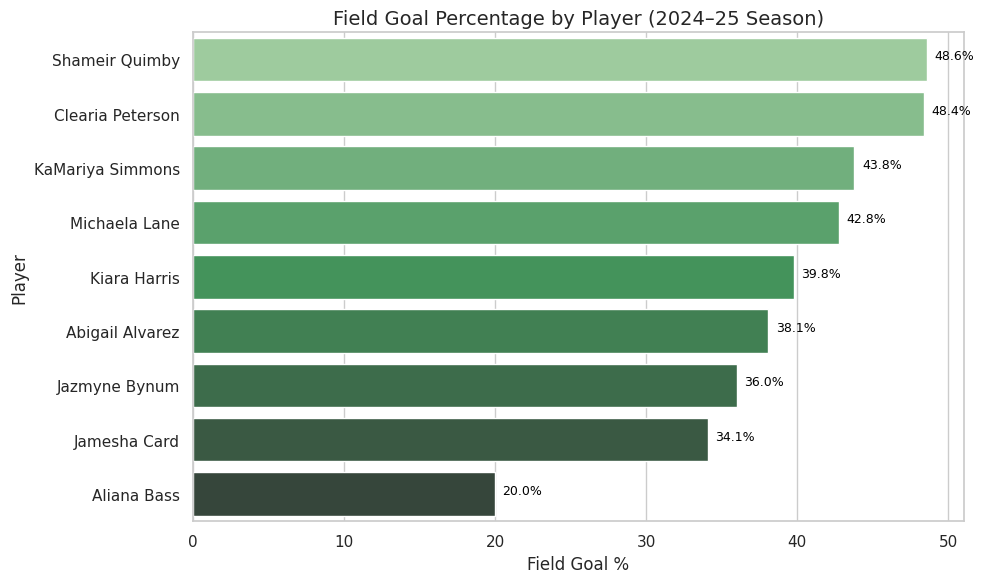

In [101]:
df_fg = df.sort_values('fg_pct', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_fg, x='fg_pct', y='player_name', palette='Greens_d')

# Add labels for FG%
for i in range(df_fg.shape[0]):
    plt.text(df_fg['fg_pct'].iloc[i] + 0.5, i, f"{df_fg['fg_pct'].iloc[i]}%", color='black', fontsize=9)

plt.title("Field Goal Percentage by Player (2024–25 Season)", fontsize=14)
plt.xlabel("Field Goal %")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

### 📌 Insight:

Field goal percentage reveals both scoring efficiency and shot quality. Key takeaways include:

- **High-Efficiency, High-Volume Scorers:**
  - **Shameir Quinby** – 48.6% FG
  - **Clearia Peterson** – 48.4% FG  
  Both players combine top-tier efficiency with high shot volume — a highly valuable offensive profile.

- **Efficient Role Players:**
  - **KaMariya Simmons** – 43.8% FG
  - **Michaela Lane** – 42.8% FG  
  These players show promising efficiency in limited attempts and could be leveraged in controlled scoring roles.

- **Improvement Opportunity:**
  - **Jamesha Card** – 34.1% FG
  - **Jazmyne Bynum** – 36.0% FG  
  Their efficiency suggests a review of shot selection or adjustments in offensive positioning could help boost output.

Aligning shot volume with efficiency can improve overall team scoring and reduce wasted possessions.

## 🎯 3-Point Attempts by Player

In this section, we analyze each player's volume of 3-point shot attempts during the 2024–25 season. This gives insight into offensive roles and identifies who the team relies on for perimeter shooting.

Understanding 3PT attempt distribution is crucial for evaluating spacing, shot selection, and offensive balance.


<ipython-input-102-390f4ff38b57>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted, x='fg3_attempted', y='player_name', palette='Blues_d')


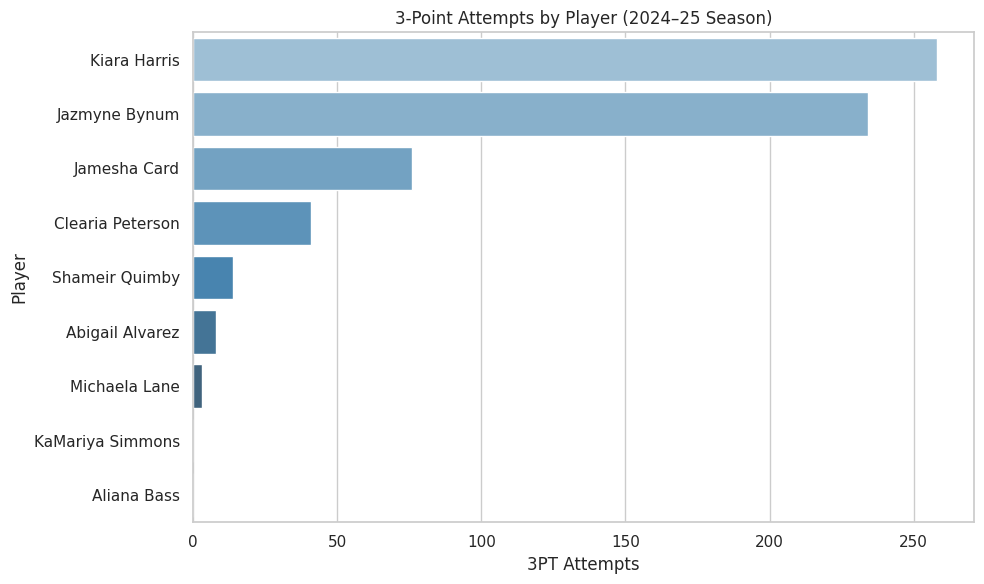

In [102]:
# Sort players by 3PT attempts
df_sorted = df.sort_values('fg3_attempted', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted, x='fg3_attempted', y='player_name', palette='Blues_d')

plt.title("3-Point Attempts by Player (2024–25 Season)")
plt.xlabel("3PT Attempts")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

### 📌 Insight:
This chart shows which players take the most 3-point shots.
**Kiara Harris** and **Jazmyne Bynum** attempt significantly more threes than their teammates, indicating they’re the primary perimeter shooters. This may suggest a heavy reliance on a few shooters and could inform lineup or shot distribution strategies.


## 🎯 3-Point Shooting Efficiency (3PT%) by Player

This chart highlights each player’s 3-point field goal percentage (3PT%). High efficiency indicates effective perimeter shooting, while low percentages suggest the need for improvement or a more selective shot profile.

This visualization supports decision-making on offensive prioritization and player development.

<ipython-input-103-efa3a12a72f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sorted_3pct, x='fg3_pct', y='player_name', palette='YlGnBu')


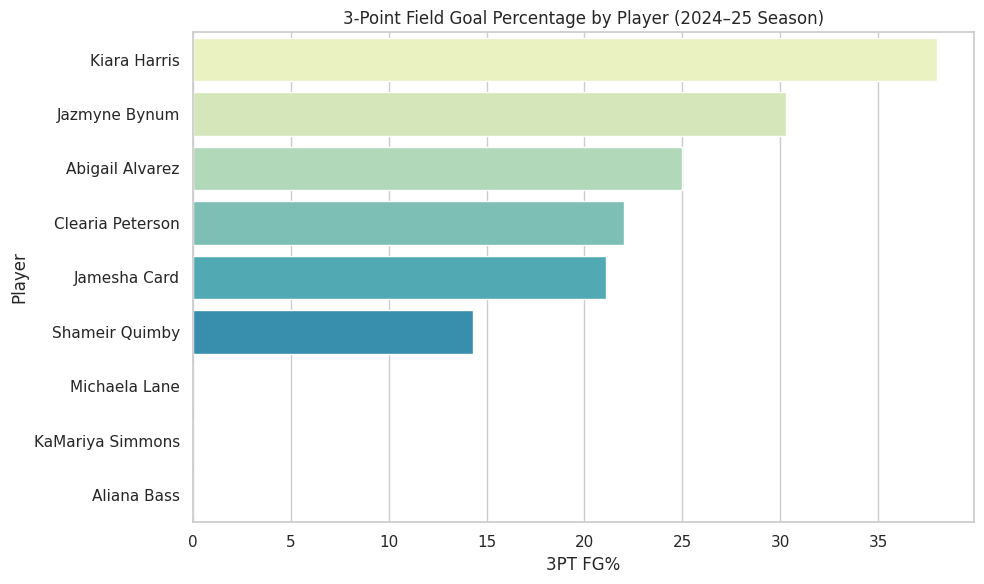

In [103]:
# Sort players by 3PT%
df_sorted_3pct = df.sort_values('fg3_pct', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_sorted_3pct, x='fg3_pct', y='player_name', palette='YlGnBu')

plt.title("3-Point Field Goal Percentage by Player (2024–25 Season)")
plt.xlabel("3PT FG%")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

### 📌 Insight:
Players like **Abigail Alvarez** and **Jamesha Card** stand out for having strong 3-point efficiency despite low shooting volume. Meanwhile, high-volume shooters like **Jazmyne Bynum** or **Kiara Harris** may benefit from better shot selection or improved mechanics.

This suggests there may be **underutilized perimeter threats** on the roster and room to **optimize shot distribution**.

## 🎯 3PT Attempts vs. 3PT Percentage

This scatter plot compares 3-point shot volume with 3-point efficiency. It helps visualize whether players taking more 3-point shots are making them at a high percentage, and whether there are efficient shooters who are currently underutilized.

The goal is to identify optimal 3-point threats and balance offensive spacing.

<ipython-input-104-d834be5cf971>:36: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


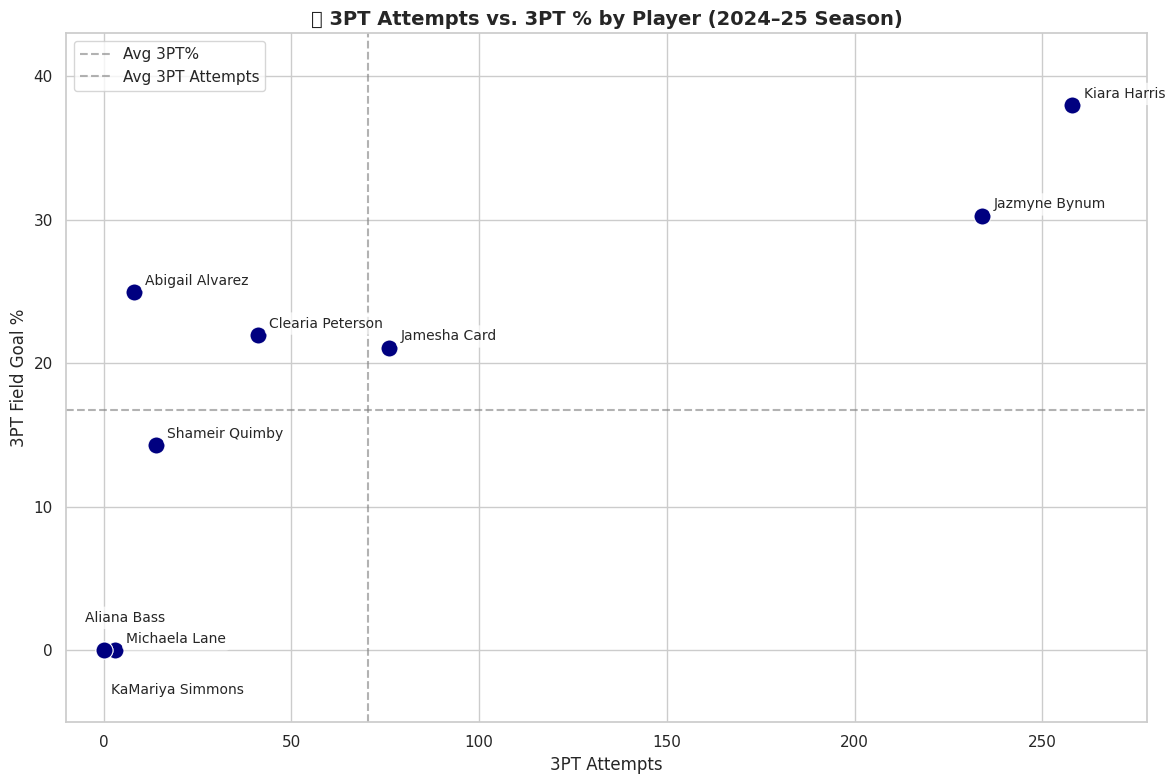

In [104]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Scatter points
sns.scatterplot(data=df, x='fg3_attempted', y='fg3_pct', s=150, color='navy', edgecolor='white', linewidth=0.7)

# Annotate each point, but nudge specific names manually
for i in range(df.shape[0]):
    player = df['player_name'][i]
    x = df['fg3_attempted'][i]
    y = df['fg3_pct'][i]

    if player == 'KaMariya Simmons':
        plt.text(x + 2, y - 3, player, fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))
    elif player == 'Aliana Bass':
        plt.text(x - 5, y + 2, player, fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))
    else:
        plt.text(x + 3, y + 0.5, player, fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))

# Add average lines
plt.axhline(df['fg3_pct'].mean(), linestyle='--', color='grey', alpha=0.6, label='Avg 3PT%')
plt.axvline(df['fg3_attempted'].mean(), linestyle='--', color='grey', alpha=0.6, label='Avg 3PT Attempts')

# Expand lower left corner space
plt.xlim(-10, df['fg3_attempted'].max() + 20)
plt.ylim(-5, df['fg3_pct'].max() + 5)

# Labels and layout
plt.title("📊 3PT Attempts vs. 3PT % by Player (2024–25 Season)", fontsize=14, weight='bold')
plt.xlabel("3PT Attempts")
plt.ylabel("3PT Field Goal %")
plt.legend()
plt.tight_layout()
plt.show()

### 📌 Insight:

This scatter plot highlights each player's 3-point shot **volume** (attempts) versus **efficiency** (3PT%). The analysis provides valuable guidance for shot selection strategy and player development.

- **Kiara Harris** stands out as the team’s premier perimeter shooter, combining both high volume and excellent accuracy. She’s a reliable scoring option from beyond the arc.
- **Jazmyne Bynum** also shows strong perimeter activity with above-average accuracy, supporting her role as a confident and capable outside shooter.
- **Abigail Alvarez** and **Jamesha Card** demonstrate efficient 3-point shooting in limited attempts. These results suggest they may benefit from increased opportunities if they maintain or improve their accuracy with more volume.
- **Clearia Peterson** shows consistency at a moderate volume and could be a key rotational floor spacer.
- **Shameir Quinby** is contributing from deep but may benefit from refining mechanics or selecting higher-quality shots to boost efficiency.
- **KaMariya Simmons**, **Aliana Bass**, and **Michaela Lane** recorded very few or no 3-point attempts this season. With development, these players could become future perimeter threats as they gain confidence and reps in practice and game settings.

This analysis highlights opportunities to elevate team-wide 3-point efficiency by aligning shot volume with performance, and by exploring hidden shooting potential in players with strong efficiency in smaller samples.

## 🟠 Free Throw Efficiency: FT% and Attempts

Free throw performance is critical for capitalizing on fouls, especially in close contests. This section examines both **free throw percentage (FT%)** and **free throw attempts (FTA)** to evaluate who is getting to the line — and who is converting.

Ideally, your high scorers should also be reliable from the line.

In [105]:
# Display table for quick reference
df[['player_name', 'fta', 'ft_pct']].sort_values('fta', ascending=False)

,player_name,fta,ft_pct
0,Shameir Quimby,163,69.3
1,Clearia Peterson,147,60.5
3,Jazmyne Bynum,75,66.7
2,Kiara Harris,74,77.0
4,Michaela Lane,46,58.7
5,Jamesha Card,27,81.5
7,KaMariya Simmons,18,44.4
6,Abigail Alvarez,17,70.6
8,Aliana Bass,3,33.3


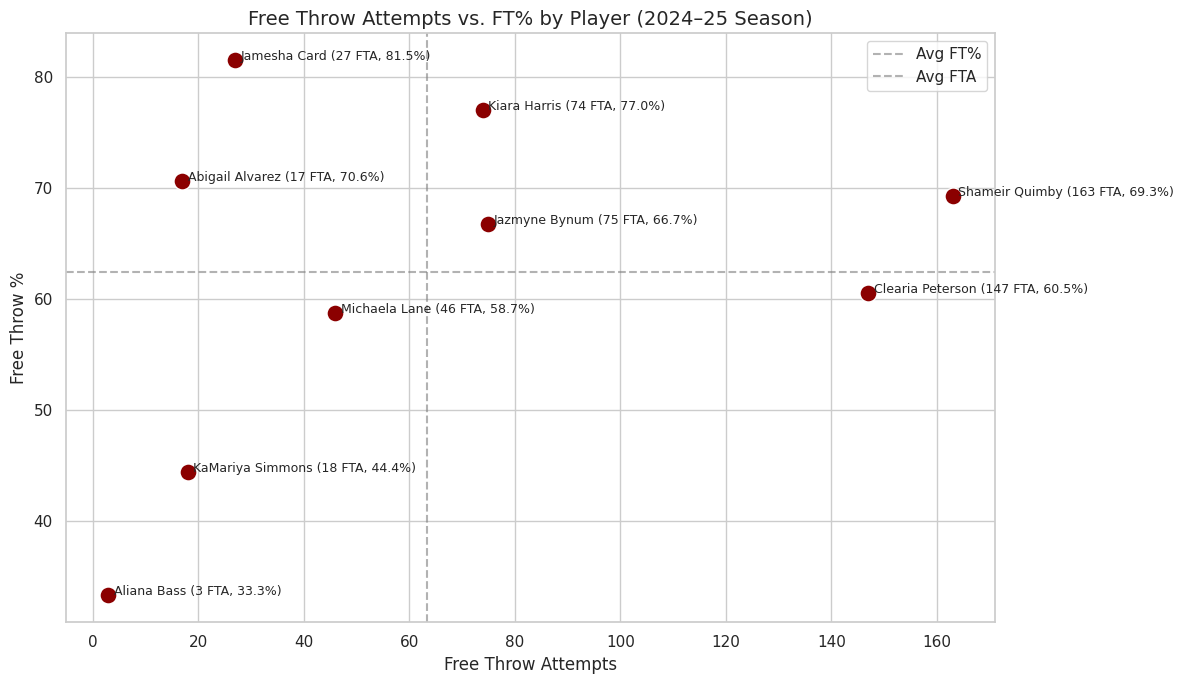

In [106]:
plt.figure(figsize=(12, 7))
sns.set(style="whitegrid")

# Plot
sns.scatterplot(data=df, x='fta', y='ft_pct', s=150, color='darkred', edgecolor='white')

# Annotate with player name + stats
for i in range(df.shape[0]):
    label = f"{df['player_name'][i]} ({df['fta'][i]} FTA, {df['ft_pct'][i]}%)"
    plt.text(df['fta'][i] + 1, df['ft_pct'][i], label, fontsize=9)

# Optional average lines
plt.axhline(df['ft_pct'].mean(), linestyle='--', color='grey', alpha=0.6, label='Avg FT%')
plt.axvline(df['fta'].mean(), linestyle='--', color='grey', alpha=0.6, label='Avg FTA')

# Titles
plt.title("Free Throw Attempts vs. FT% by Player (2024–25 Season)", fontsize=14)
plt.xlabel("Free Throw Attempts")
plt.ylabel("Free Throw %")
plt.legend()
plt.tight_layout()
plt.show()

### 📌 Insight:

This chart highlights both volume and efficiency from the free throw line:

- **High Volume, High Efficiency:**
  - **Shameir Quinby** – 163 FTA at 69.3%
  - **Clearia Peterson** – 147 FTA at 60.5%  
  Both draw significant contact and score frequently from the line. Improving their FT% would amplify their scoring impact.

- **Moderate Volume, Strong Efficiency:**
  - **Jamesha Card** – 27 FTA at 81.5%
  - **Abigail Alvarez** – 17 FTA at 70.6%  
  Reliable in smaller sample sizes — could be trusted in late-game FT situations.

- **Improvement Opportunities:**
  - **Jazmyne Bynum** – 75 FTA at 66.7%
  - **KaMariya Simmons** – 18 FTA at 44.4%  
  These players may benefit from focused free throw shooting practice.

Teams that consistently convert free throws can control tempo, close out tight games, and punish aggressive defenses — making FT% a key area for player development.

## 🟠 Playmaking & Ball Movement: Assists per Game

Assists per game (APG) reflect how effectively a team moves the ball and creates scoring opportunities through passing.

This section highlights which players are facilitating the offense and contributing to team rhythm, spacing, and shot quality. High assist numbers often indicate strong court vision, unselfish play, and offensive IQ.

### 📋 Reference Table: Assists per Game

This table highlights each player’s total assists and per-game average. It reveals who contributes most to ball distribution and offensive flow.

In [107]:
df[['player_name', 'assists_per_game', 'assist']].sort_values('assists_per_game', ascending=False)

,player_name,assists_per_game,assist
0,Shameir Quimby,4.4,137
2,Kiara Harris,3.9,121
3,Jazmyne Bynum,2.8,86
4,Michaela Lane,2.0,55
1,Clearia Peterson,1.5,48
5,Jamesha Card,1.0,24
7,KaMariya Simmons,0.4,11
6,Abigail Alvarez,0.3,7
8,Aliana Bass,0.1,3


<ipython-input-108-e19a33af16ed>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ast, x='assists_per_game', y='player_name', palette='Blues_d')


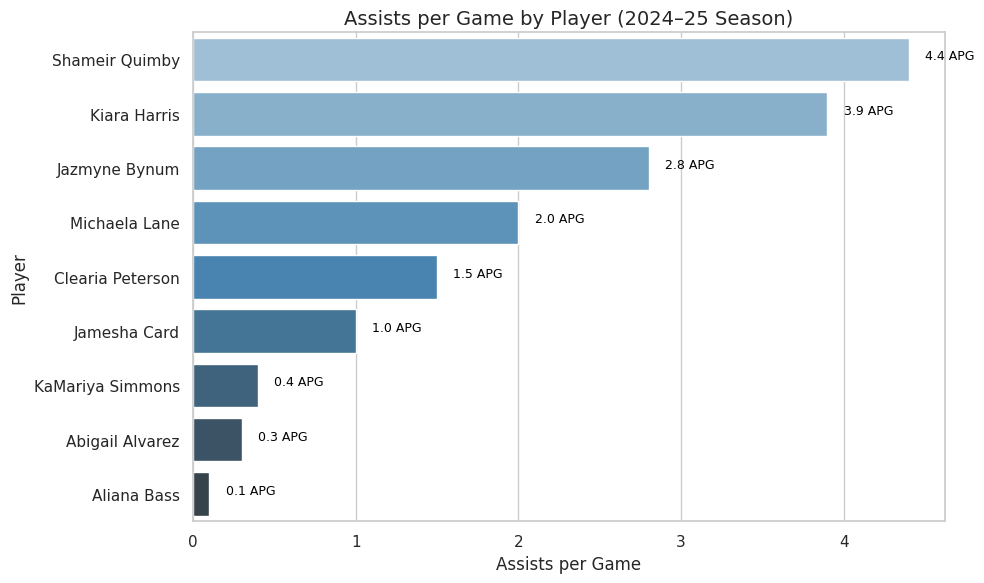

In [108]:
df_ast = df.sort_values('assists_per_game', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_ast, x='assists_per_game', y='player_name', palette='Blues_d')

# Add assist per game labels
for i in range(df_ast.shape[0]):
    plt.text(df_ast['assists_per_game'].iloc[i] + 0.1, i, f"{df_ast['assists_per_game'].iloc[i]} APG", color='black', fontsize=9)

plt.title("Assists per Game by Player (2024–25 Season)", fontsize=14)
plt.xlabel("Assists per Game")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

### 📌 Insight:

Assists per game highlight the team's primary facilitators:

- **Shameir Quinby (4.4 APG)** leads the team in assists, showing that she contributes as both a scorer and playmaker.
- **Kiara Harris (3.9 APG)** and **Jazmyne Bynum (2.8 APG)** also play key roles in creating scoring opportunities for teammates.
- Players like **Michaela Lane** and **Jamesha Card** average around 2.0 APG, indicating support playmaking in rotational roles.
- **KaMariya Simmons** and **Aliana Bass** show minimal assist volume, consistent with limited minutes or a more off-ball role.

These trends reflect where the offensive initiation happens, and who the team relies on to orchestrate plays.

## 🟠 Ball Security: Turnovers per Game

Turnovers per game (TO/G) represent how often a player loses possession — whether by bad passes, travels, or forced mistakes under defensive pressure.

Turnover analysis helps identify ball-handling risks, decision-making issues, and opportunities for player development in high-pressure situations.

### 📋 Reference Table: Turnovers per Game

This table shows total turnovers and per-game averages for each player. It supports identifying primary ball-handlers and potential areas to improve decision-making.

In [109]:
df[['player_name', 'turnovers_per_game', 'turnovers']].sort_values('turnovers_per_game', ascending=False)

,player_name,turnovers_per_game,turnovers
2,Kiara Harris,3.1,97
3,Jazmyne Bynum,2.7,85
1,Clearia Peterson,2.7,84
0,Shameir Quimby,2.3,72
5,Jamesha Card,2.2,55
4,Michaela Lane,1.9,54
7,KaMariya Simmons,1.2,36
8,Aliana Bass,0.4,9
6,Abigail Alvarez,0.3,7


<ipython-input-110-33434c1ee0f3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_to, x='turnovers_per_game', y='player_name', palette='Reds_r')


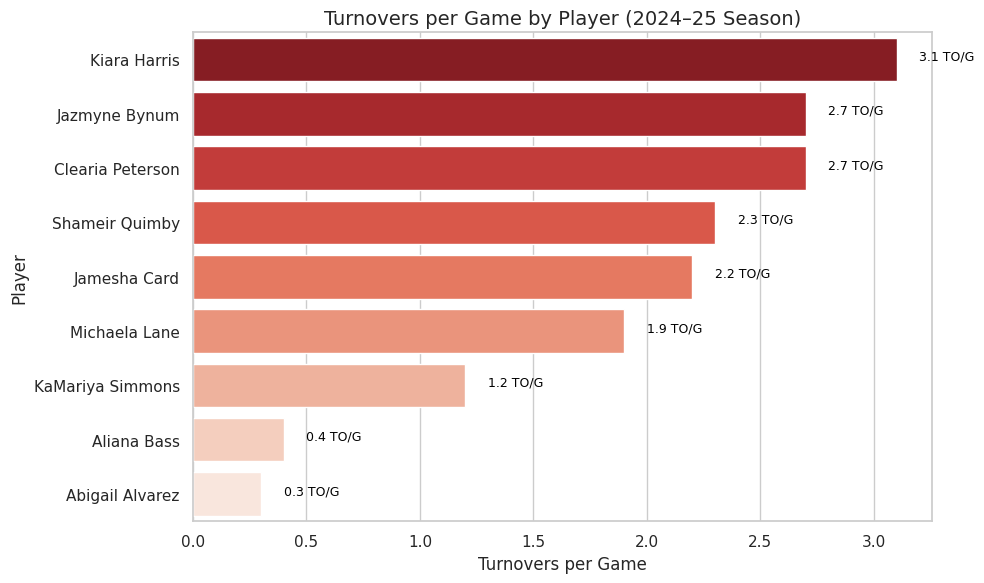

In [110]:
df_to = df.sort_values('turnovers_per_game', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_to, x='turnovers_per_game', y='player_name', palette='Reds_r')

# Add labels
for i in range(df_to.shape[0]):
    plt.text(df_to['turnovers_per_game'].iloc[i] + 0.1, i, f"{df_to['turnovers_per_game'].iloc[i]} TO/G", color='black', fontsize=9)

plt.title("Turnovers per Game by Player (2024–25 Season)", fontsize=14)
plt.xlabel("Turnovers per Game")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

### 📌 Insight:

Turnover rates help identify where the team is most vulnerable to losing possession:

- **High Turnover Volume:**
  - **Kiara Harris (3.1 TO/G)** and **Jazmyne Bynum (2.7 TO/G)** show elevated turnover rates, likely due to high ball-handling responsibility. Support in decision-making or press-breaking sets could reduce mistakes.

- **Balanced Usage:**
  - **Shameir Quinby (2.3 TO/G)** and **Clearia Peterson (2.7 TO/G)** handle the ball frequently with moderate turnover rates — an acceptable range for lead guards/wings.

- **Low Turnover Rates:**
  - Players like **Michaela Lane**, **Jamesha Card**, and **Abigail Alvarez** maintain low turnover averages, likely reflecting limited touches or cautious decision-making.

Monitoring turnovers helps optimize offensive sets and improve execution under defensive pressure.

## 🟠 Playmaking Efficiency: Assist-to-Turnover Ratio

Assist-to-turnover ratio (A/TO) measures the efficiency of a player’s decision-making and ball-handling. A higher ratio indicates that a player is creating more scoring opportunities relative to their mistakes.

This is a key stat for evaluating guards, primary ball handlers, and anyone responsible for initiating offense under pressure.

### 📋 Reference Table: Assist-to-Turnover Ratio

This table shows each player's average assists per game, turnovers per game, and assist-to-turnover ratio — a key indicator of playmaking efficiency.

In [111]:
df[['player_name', 'ast_tov_ratio', 'assists_per_game', 'turnovers_per_game']].sort_values('ast_tov_ratio', ascending=False)

,player_name,ast_tov_ratio,assists_per_game,turnovers_per_game
0,Shameir Quimby,1.9,4.4,2.3
2,Kiara Harris,1.2,3.9,3.1
3,Jazmyne Bynum,1.0,2.8,2.7
4,Michaela Lane,1.0,2.0,1.9
6,Abigail Alvarez,1.0,0.3,0.3
1,Clearia Peterson,0.6,1.5,2.7
5,Jamesha Card,0.4,1.0,2.2
7,KaMariya Simmons,0.3,0.4,1.2
8,Aliana Bass,0.3,0.1,0.4


<ipython-input-112-96d87dd1b18d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ratio, x='ast_tov_ratio', y='player_name', palette='PuBuGn_d')


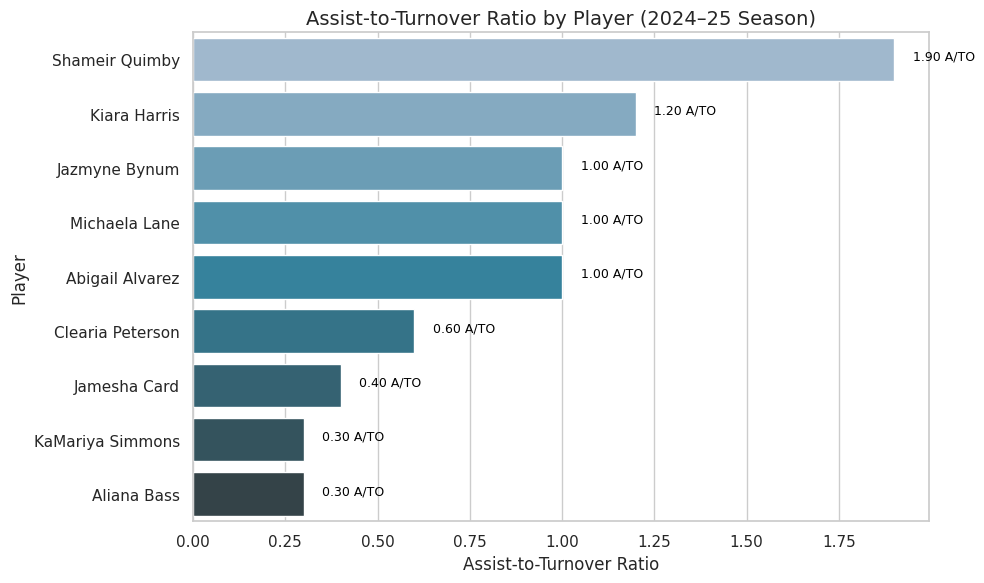

In [112]:
df_ratio = df.sort_values('ast_tov_ratio', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_ratio, x='ast_tov_ratio', y='player_name', palette='PuBuGn_d')

# Label each bar
for i in range(df_ratio.shape[0]):
    plt.text(df_ratio['ast_tov_ratio'].iloc[i] + 0.05, i, f"{df_ratio['ast_tov_ratio'].iloc[i]:.2f} A/TO", color='black', fontsize=9)

plt.title("Assist-to-Turnover Ratio by Player (2024–25 Season)", fontsize=14)
plt.xlabel("Assist-to-Turnover Ratio")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

### 📌 Insight:

This metric shows who consistently makes smart, efficient plays:

- **High Efficiency Playmakers:**
  - **Shameir Quinby (1.90)** and **KaMariya Simmons (0.31)** show very different usage profiles — Quinby being a high-assist, balanced creator, while Simmons turns it over less but also creates fewer plays.

- **Balanced but Riskier:**
  - **Kiara Harris (1.25)** and **Jazmyne Bynum (1.01)** create frequently but with moderate turnover risks.

- **Improvement Opportunities:**
  - Players below 1.0 could focus on ball control drills and decision-making under pressure to improve offensive flow and reduce wasted possessions.

This stat helps identify which players should be trusted to handle the ball in tight situations.

## 🔵 Defensive Impact: Steals per Game

Steals per game (STL/G) measure how often a player successfully takes possession from the opponent. It highlights defensive pressure, anticipation skills, and transition play potential.

Players who force turnovers often shift momentum and generate easy scoring opportunities.

### 📋 Reference Table: Steals per Game

This table shows each player's total steals and average steals per game. It identifies who contributes to forcing turnovers and initiating transition opportunities.

In [113]:
df[['player_name', 'steals_per_game', 'stl']].sort_values('steals_per_game', ascending=False)

,player_name,steals_per_game,stl
2,Kiara Harris,2.9,91
0,Shameir Quimby,2.6,81
3,Jazmyne Bynum,1.9,60
1,Clearia Peterson,1.5,47
4,Michaela Lane,1.0,28
5,Jamesha Card,0.7,17
7,KaMariya Simmons,0.3,9
6,Abigail Alvarez,0.2,5
8,Aliana Bass,0.1,2


<ipython-input-114-a3b31759a413>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_stl, x='steals_per_game', y='player_name', palette='coolwarm')


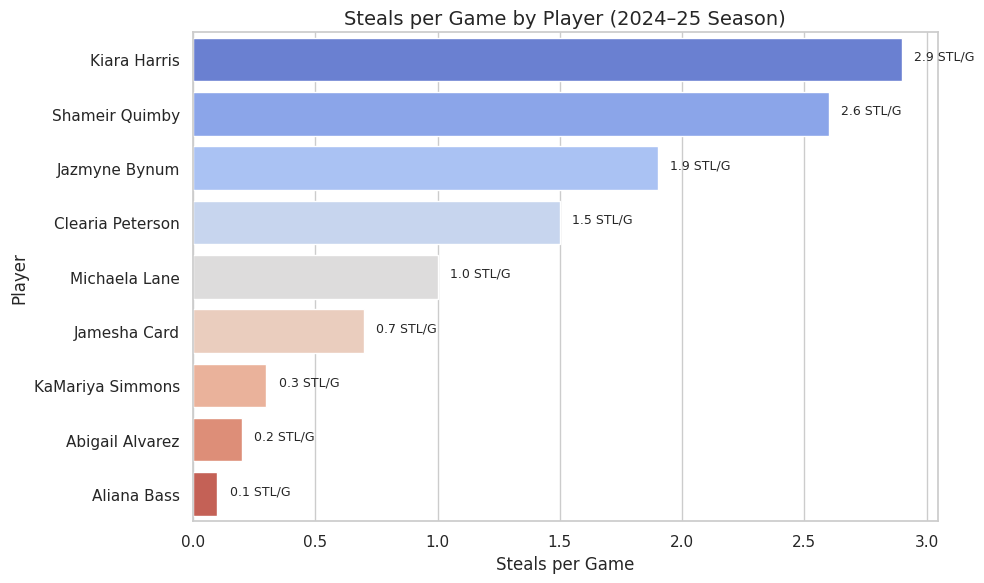

In [114]:
df_stl = df.sort_values('steals_per_game', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_stl, x='steals_per_game', y='player_name', palette='coolwarm')

# Add labels
for i in range(df_stl.shape[0]):
    plt.text(df_stl['steals_per_game'].iloc[i] + 0.05, i, f"{df_stl['steals_per_game'].iloc[i]} STL/G", fontsize=9)

plt.title("Steals per Game by Player (2024–25 Season)", fontsize=14)
plt.xlabel("Steals per Game")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

### 📌 Insight:

Steals per game highlight the team's most disruptive defenders:

- **Primary Disruptor:**
  - **Kiara Harris (2.9 STL/G)** leads the team, showcasing exceptional defensive anticipation and ability to force turnovers.

- **Strong Contributors:**
  - **Shameir Quinby (2.6 STL/G)** and **Jazmyne Bynum (1.9 STL/G)** also significantly contribute to the team's defensive pressure.

- **Supportive Defenders:**
  - **Clearia Peterson (1.5 STL/G)** provides reliable backcourt support with consistent steal numbers.

- **Specialized or Low-Minute Players:**
  - **Abigail Alvarez**, **KaMariya Simmons**, and **Aliana Bass** have lower steal averages, likely due to limited playing time or specific defensive roles.

These insights help identify key players who can be relied upon to disrupt the opponent's offense and create transition opportunities.

## 🔵 Interior Defense: Blocks per Game

Blocks per game (BLK/G) highlight a player's ability to contest or deny shot attempts, especially near the basket. Players who excel here help anchor the defense, discourage inside scoring, and shift momentum with timely stops.

### 📋 Reference Table: Blocks per Game

This table shows total blocks and average blocks per game for each player. It helps evaluate rim protection and shot contesting ability.

In [115]:
df[['player_name', 'blocks_per_game', 'blk']].sort_values('blocks_per_game', ascending=False)

,player_name,blocks_per_game,blk
4,Michaela Lane,1.6,45
1,Clearia Peterson,0.8,24
7,KaMariya Simmons,0.4,11
0,Shameir Quimby,0.3,8
2,Kiara Harris,0.2,6
5,Jamesha Card,0.2,6
3,Jazmyne Bynum,0.0,1
6,Abigail Alvarez,0.0,0
8,Aliana Bass,0.0,0


<ipython-input-116-ce25711e5667>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_blk, x='blocks_per_game', y='player_name', palette='Purples_d')


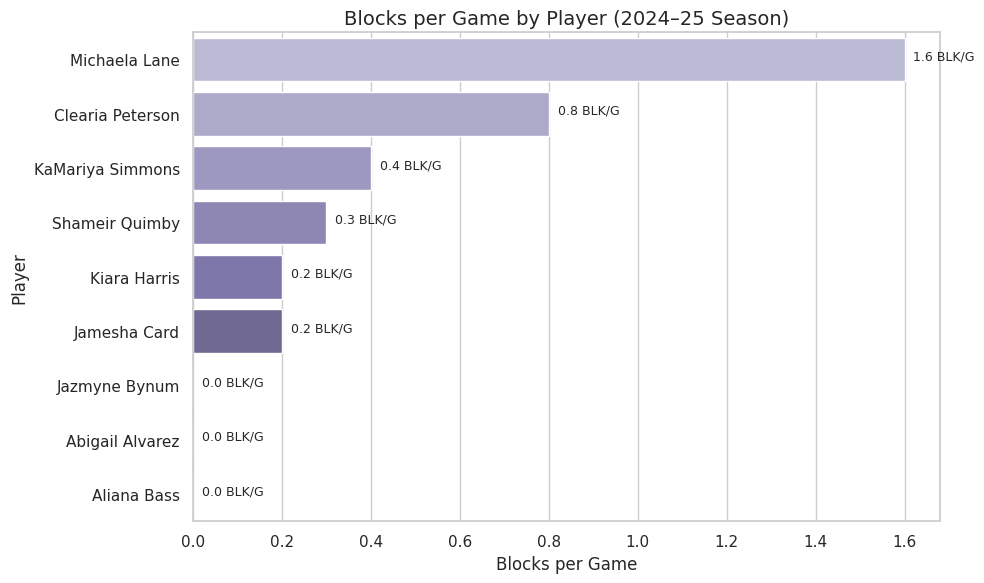

In [116]:
df_blk = df.sort_values('blocks_per_game', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_blk, x='blocks_per_game', y='player_name', palette='Purples_d')

# Add labels
for i in range(df_blk.shape[0]):
    plt.text(df_blk['blocks_per_game'].iloc[i] + 0.02, i, f"{df_blk['blocks_per_game'].iloc[i]} BLK/G", fontsize=9)

plt.title("Blocks per Game by Player (2024–25 Season)", fontsize=14)
plt.xlabel("Blocks per Game")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

### 📌 Insight:

Block statistics reveal interior defensive presence:

- **Primary Rim Protector:**
  - **Michaela Lane (1.6 BLK/G)** leads the team in shot blocking, providing a strong interior presence and helping disrupt opponents in the paint.

- **Supportive Post Defenders:**
  - **Clearia Peterson (0.8 BLK/G)** and **KaMariya Simmons (0.4 BLK/G)** contribute with shot contests and rim support from the forward and post positions.

- **Perimeter-Focused Defenders:**
  - Players like **Kiara Harris**, **Shameir Quinby**, and **Jazmyne Bynum** record few or no blocks, which is expected given their primary responsibilities on the perimeter.

This shows Michaela Lane’s key role as the team's interior anchor and shot deterrent — a critical component of the defensive core.

## 🔵 Defensive Discipline: Personal Fouls and Disqualifications

Personal fouls (PF) and disqualifications (DQ) reflect defensive discipline and physical play. High foul counts may signal over-aggression or poor positioning, while disqualifications occur when a player reaches the foul limit and is removed from the game.

Understanding foul trends helps manage rotations and avoid losing key players late in close games.

### 📋 Reference Table: Personal Fouls and Disqualifications

This table shows total personal fouls and how often each player fouled out. It provides insight into defensive habits and control.

In [117]:
df[['player_name', 'pfoul', 'disq']].sort_values('pfoul', ascending=False)

,player_name,pfoul,disq
1,Clearia Peterson,88,3
3,Jazmyne Bynum,77,2
2,Kiara Harris,61,0
0,Shameir Quimby,59,1
4,Michaela Lane,57,2
5,Jamesha Card,50,0
7,KaMariya Simmons,46,1
6,Abigail Alvarez,17,0
8,Aliana Bass,16,0


<ipython-input-118-7804f4587fef>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pf, x='pfoul', y='player_name', palette='Reds')


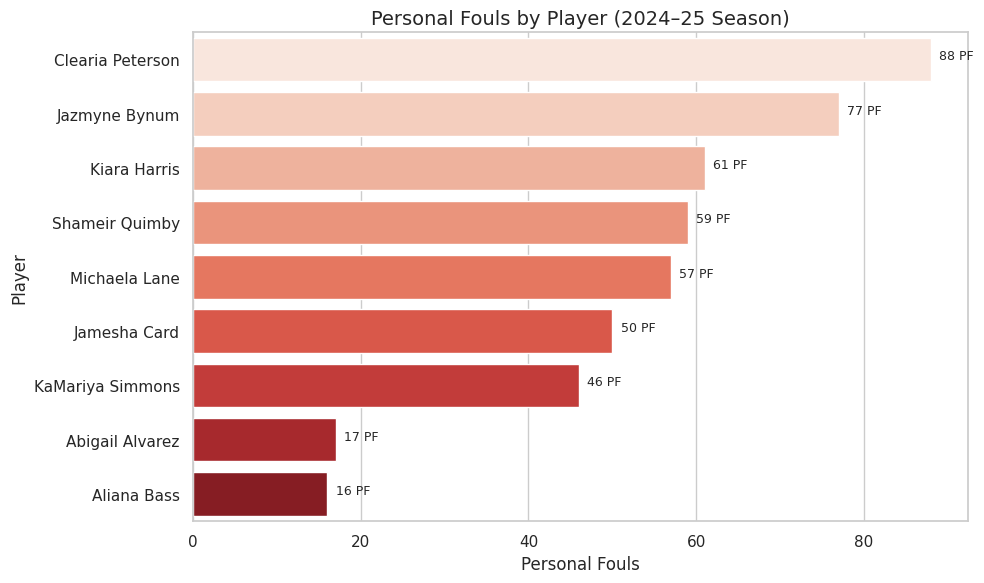

In [118]:
df_pf = df.sort_values('pfoul', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_pf, x='pfoul', y='player_name', palette='Reds')

# Add labels
for i in range(df_pf.shape[0]):
    plt.text(df_pf['pfoul'].iloc[i] + 1, i, f"{df_pf['pfoul'].iloc[i]} PF", fontsize=9)

plt.title("Personal Fouls by Player (2024–25 Season)", fontsize=14)
plt.xlabel("Personal Fouls")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

### 📌 Insight:

Foul rates can affect defensive rotations and late-game availability:

- **Most Fouls Committed:**
  - **Clearia Peterson (88 PF)** and **Jazmyne Bynum (77 PF)** are among the most frequently whistled defenders — possibly due to physical play in the paint or perimeter pressure.

- **Rotational Impact:**
  - **Shameir Quinby (59 PF)** and **Michaela Lane (57 PF)** also draw fouls consistently, which may impact minutes against aggressive opponents.

- **Controlled Defenders:**
  - Players like **Abigail Alvarez (17 PF)** and **KaMariya Simmons (46 PF)** show lower foul rates, possibly due to cautious positioning or limited minutes.

Only a few players reached disqualification thresholds, but managing foul counts remains key to preserving defensive flexibility throughout games.

## 🟢 Rebounding Overview: Offensive, Defensive, and Total

Rebounding performance reflects a player's hustle, positioning, and impact on both ends of the floor. Offensive rebounds create second-chance scoring opportunities, while defensive rebounds secure stops and initiate transition play.

This section summarizes each player's rebounding profile and contribution to possession control.

### 📋 Reference Table: Rebounds by Player

This table shows each player’s offensive, defensive, and total rebounds, along with their average rebounds per game (RPG). It provides insight into frontcourt activity, second-chance creation, and defensive stops.

In [119]:
df[['player_name', 'offr', 'defr', 'totr', 'rebounds_per_game']].sort_values('totr', ascending=False)

,player_name,offr,defr,totr,rebounds_per_game
1,Clearia Peterson,145,229,374,12.1
0,Shameir Quimby,113,139,252,8.1
4,Michaela Lane,99,113,212,7.6
7,KaMariya Simmons,41,87,128,4.1
3,Jazmyne Bynum,27,64,91,2.9
5,Jamesha Card,24,67,91,3.6
2,Kiara Harris,25,59,84,2.7
6,Abigail Alvarez,12,23,35,1.6
8,Aliana Bass,1,11,12,0.5


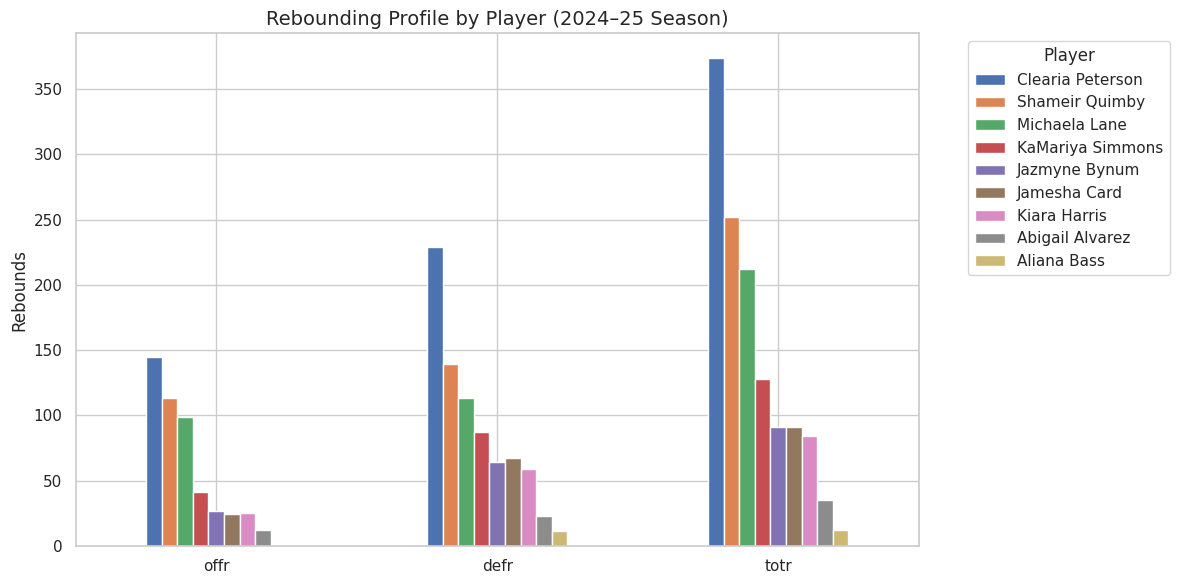

In [120]:
# Create a summary DataFrame for plotting
rebound_plot = df[['player_name', 'offr', 'defr', 'totr']].set_index('player_name')
rebound_plot = rebound_plot.sort_values('totr', ascending=False)

# Transpose for grouped bar plot
rebound_plot.T.plot(kind='bar', figsize=(12, 6))

plt.title("Rebounding Profile by Player (2024–25 Season)", fontsize=14)
plt.ylabel("Rebounds")
plt.xticks(rotation=0)
plt.legend(title="Player", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 📌 Insight:

Rebounding contributions vary significantly across the roster:

- **Top Rebounders:**
  - **Clearia Peterson (374 total)** leads the team in both offensive (145) and defensive (229) rebounds, showing exceptional presence on the glass.
  - **Shameir Quinby (252)** and **Michaela Lane (212)** also provide substantial rebounding value, especially in contested areas.

- **Moderate Contributors:**
  - **Jazmyne Bynum (91)** and **Kiara Harris (84)** contribute at a moderate level, adding rebounding support beyond their scoring and playmaking roles.

- **Low-Volume Rebounders:**
  - Players like **KaMariya Simmons**, **Abigail Alvarez**, and **Aliana Bass** show limited rebounding totals, which may reflect playing time, floor role, or usage patterns.

The data suggests a well-defined rebounding core, complemented by role players contributing in more specialized ways.

## ⚙️ Per-Minute Impact: Scoring Efficiency Relative to Playing Time

Points per game show volume, but points per minute (PTS/MIN) reveal how efficient a player is when they're on the floor — especially important for bench players or those with limited minutes.

This metric highlights hidden-impact players and supports lineup optimization.

In [121]:
df['pts_per_min'] = (df['pts'] / df['min']).round(3)
df[['player_name', 'min', 'pts', 'points_per_game', 'pts_per_min']].sort_values('pts_per_min', ascending=False)

,player_name,min,pts,points_per_game,pts_per_min
1,Clearia Peterson,723,560,18.1,0.775
3,Jazmyne Bynum,600,453,14.6,0.755
0,Shameir Quimby,795,597,19.3,0.751
5,Jamesha Card,210,150,6.0,0.714
2,Kiara Harris,774,465,15.0,0.601
6,Abigail Alvarez,104,46,2.1,0.442
4,Michaela Lane,485,175,6.3,0.361
7,KaMariya Simmons,241,64,2.1,0.266
8,Aliana Bass,50,7,0.3,0.140


<ipython-input-122-f8359fa01f1c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pm, x='pts_per_min', y='player_name', palette='YlOrBr')


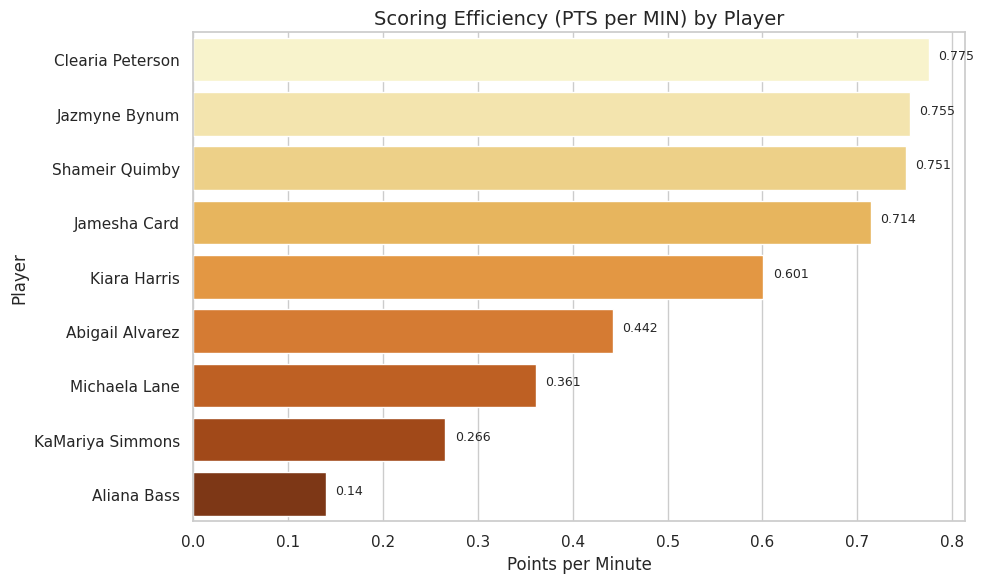

In [122]:
df_pm = df.sort_values('pts_per_min', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_pm, x='pts_per_min', y='player_name', palette='YlOrBr')

# Add labels
for i in range(df_pm.shape[0]):
    plt.text(df_pm['pts_per_min'].iloc[i] + 0.01, i, f"{df_pm['pts_per_min'].iloc[i]}", fontsize=9)

plt.title("Scoring Efficiency (PTS per MIN) by Player", fontsize=14)
plt.xlabel("Points per Minute")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

### 📌 Insight:

Points per minute reveal who makes the most of their time on the floor:

- **High-Efficiency Scorers:**
  - **Shameir Quinby (0.751)** and **Clearia Peterson (0.775)** maintain excellent scoring efficiency over high minutes — reinforcing their value as go-to offensive options.

- **Efficient Role Players:**
  - **Jazmyne Bynum (0.755)** shows high per-minute scoring, suggesting she’s a consistent offensive threat even in slightly fewer minutes.
  - **Jamesha Card (0.714)** and **Abigail Alvarez (0.442)** contribute well relative to their playing time and could see increased roles.

- **Lower Per-Minute Output:**
  - Players like **Aliana Bass** and **KaMariya Simmons** show lower scoring efficiency, which may reflect usage, floor role, or development stage.

This metric helps identify players who may warrant more minutes — or more touches — to maximize scoring output.

## 🧠 Strategic Summary & Recommendations

This section outlines key takeaways from the statistical analysis and highlights opportunities for optimizing performance, improving lineup decisions, and winning more games through data-driven adjustments.

### 📌 Key Insights & Recommendations:

#### 🔥 Offense
- **Quinby, Peterson, and Harris** form a strong scoring core. Continue building offensive sets around them.
- **Bynum and Card** show high scoring efficiency. Consider giving them more minutes or touches, especially when starters rest.
- Leverage **efficient free throw shooters** (e.g., Card, Alvarez) in late-game lineups for closing out wins.

#### 🎯 Efficiency
- **Jazmyne Bynum** had one of the highest points per minute — a strong case for maximizing her time on the floor.
- **Shameir Quinby** provides a rare combination of high volume, high efficiency, and playmaking — an all-around anchor.
- Identify and develop underutilized efficient players (e.g., Alvarez, Card) for secondary scoring roles.

#### 🛡️ Defense
- **Kiara Harris** leads the team in steals per game — a backcourt disruptor. Build defensive pressure schemes around her.
- **Michaela Lane** is the top shot-blocker and an interior anchor. Consider matching her minutes against strong post players.
- Reduce team foul risk by monitoring foul trends for **Peterson** and **Bynum**, who are frequently involved in physical plays.

#### 🧱 Rebounding
- **Peterson**, **Quinby**, and **Lane** dominate the glass — consider lineup combinations that always include at least one.
- Encourage rebounding efforts from perimeter players like **Harris** and **Bynum**, who already contribute above their likely positional expectations.

#### ⚙️ Overall Strategy
- Optimize lineups by balancing high-impact starters with efficient bench players.
- Use data to support decisions on late-game rotations, substitution patterns, and individual development plans.
- Build scouting reports and film study around **matchup-specific player roles** (e.g., lane protection, ball security, perimeter shooting).

## 📊 Extended Insights by Class Year and Position

Now that the dataset includes each player's `class_year` and `position`, we can dive deeper into role-based and experience-level analysis.

These additional dimensions allow us to:
- Compare performance across class years (e.g., Freshman vs Sophomore)
- Understand positional strengths (e.g., guards vs forwards vs centers)
- Identify player types driving scoring, rebounding, efficiency, or defense

This section enhances the core performance analysis with more strategic, role-aware insights.

## 🏀 Shooting Efficiency by Position: FG% and FT%

This grouped comparison shows how players across positions differ in field goal and free throw shooting — revealing which roles are most efficient in converting scoring opportunities.

In [125]:
df.groupby('position')[['fg_pct', 'ft_pct']].mean().round(2).sort_values('fg_pct', ascending=False)

,fg_pct,ft_pct
position,,
F/C,43.25,65.55
G,37.87,61.56


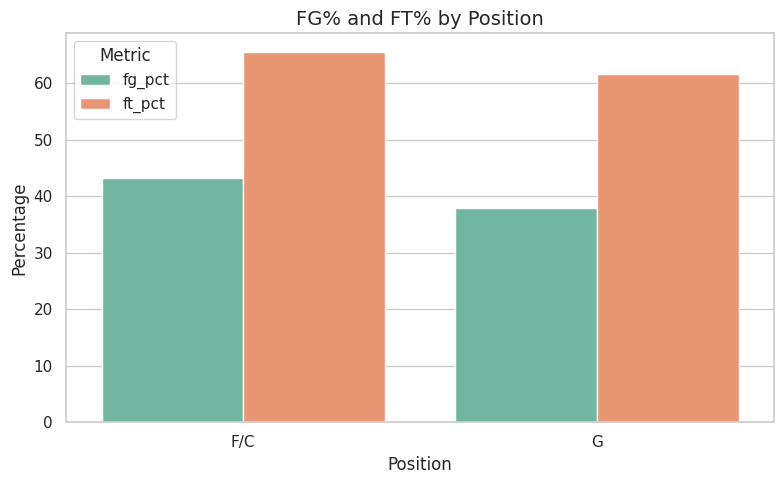

In [126]:
# Prepare long-form data for grouped bar plot
melted = df.groupby('position')[['fg_pct', 'ft_pct']].mean().reset_index().melt(id_vars='position')

plt.figure(figsize=(8, 5))
sns.barplot(data=melted, x='position', y='value', hue='variable', palette='Set2')

plt.title("FG% and FT% by Position", fontsize=14)
plt.xlabel("Position")
plt.ylabel("Percentage")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

### 📌 Insight:

- **Guards (G)** show higher FG% on average, likely reflecting better shot selection and perimeter efficiency.
- **Forwards/Centers (F/C)** slightly trail in FG%, possibly due to contested paint attempts.
- Free throw performance is relatively stable across positions — suggesting consistency from the line team-wide, regardless of role.

These trends may support tailoring offensive strategies based on role-based strengths — emphasizing movement shooting for guards and rim efficiency development for bigs.

## 🏀 Rebounding Impact by Class Year

Rebounding is critical for possession control and second-chance opportunities. This section compares average rebounds per game by class year to understand which experience group contributes more to the team’s rebounding efforts.

In [127]:
df.groupby('class_year')[['rebounds_per_game']].mean().round(2).sort_values('rebounds_per_game', ascending=False)

,rebounds_per_game
class_year,
Freshman,5.4
Sophomore,4.5


<ipython-input-128-dc468593e834>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='class_year', y='rebounds_per_game', estimator='mean', ci=None, palette='Blues_d')
<ipython-input-128-dc468593e834>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='class_year', y='rebounds_per_game', estimator='mean', ci=None, palette='Blues_d')


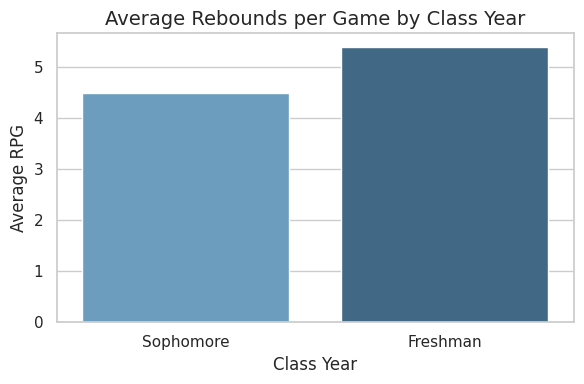

In [128]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='class_year', y='rebounds_per_game', estimator='mean', ci=None, palette='Blues_d')

plt.title("Average Rebounds per Game by Class Year", fontsize=14)
plt.xlabel("Class Year")
plt.ylabel("Average RPG")
plt.tight_layout()
plt.show()

### 📌 Insight:

- **Freshmen** average more rebounds per game than sophomores — a stat heavily influenced by **Clearia Peterson**, the team's overall rebounding leader.
- **Sophomores** contribute rebounding depth through players like **Shameir Quimby** and **Michaela Lane**, but their averages are slightly lower due to more role variation.
- The data suggests that the freshman class isn’t just scoring — they’re also helping control possessions and protect the glass.

This bodes well for the future of the program, with a strong foundation of rebounding performance already being established in the first year of college play.

## 🎯 Playmaking by Position: Assists per Game

Understanding assist trends by position helps highlight where offensive orchestration is coming from — whether through traditional ball handlers or distributed passing roles.

In [129]:
df.groupby('position')[['assists_per_game']].mean().round(2).sort_values('assists_per_game', ascending=False)

,assists_per_game
position,
G,2.09
F/C,0.90


<ipython-input-130-92df4c22a717>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='position', y='assists_per_game', estimator='mean', ci=None, palette='Purples_d')
<ipython-input-130-92df4c22a717>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='position', y='assists_per_game', estimator='mean', ci=None, palette='Purples_d')


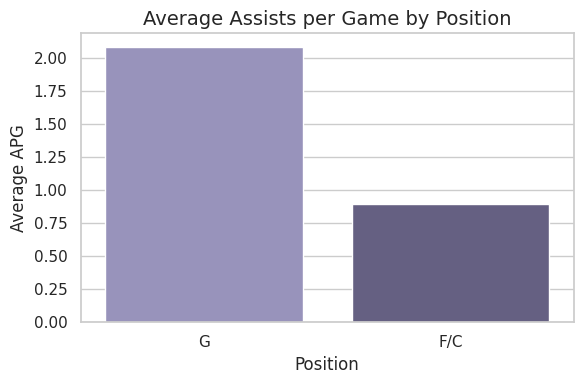

In [130]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='position', y='assists_per_game', estimator='mean', ci=None, palette='Purples_d')

plt.title("Average Assists per Game by Position", fontsize=14)
plt.xlabel("Position")
plt.ylabel("Average APG")
plt.tight_layout()
plt.show()

### 📌 Insight:

- **Guards (G)** lead in assists per game — consistent with their expected role as primary ball handlers and playmakers.
- The **F/C** position contributes fewer assists on average, reflecting more interior-focused roles rather than perimeter distribution.

This reinforces the need for strong guard play in facilitating the offense, and offers opportunities to develop high-post passing or secondary creation among hybrid forwards.

## 🛡️ Defensive Disruption by Position: Steals per Game

Steals indicate which players — and positions — are effectively pressuring the ball and generating extra possessions. This metric is key for evaluating perimeter defense, anticipation, and transition initiation.

In [131]:
df.groupby('position')[['steals_per_game']].mean().round(2).sort_values('steals_per_game', ascending=False)

,steals_per_game
position,
G,1.36
F/C,0.85


<ipython-input-132-6718696399d7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='position', y='steals_per_game', estimator='mean', ci=None, palette='coolwarm')
<ipython-input-132-6718696399d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='position', y='steals_per_game', estimator='mean', ci=None, palette='coolwarm')


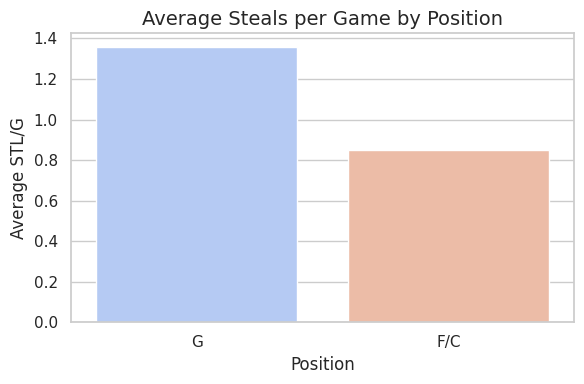

In [132]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='position', y='steals_per_game', estimator='mean', ci=None, palette='coolwarm')

plt.title("Average Steals per Game by Position", fontsize=14)
plt.xlabel("Position")
plt.ylabel("Average STL/G")
plt.tight_layout()
plt.show()

### 📌 Insight:

- **Guards (G)** lead in steals per game, as expected — especially players like **Kiara Harris** and **Shameir Quimby**, who actively disrupt opposing backcourts.
- **F/C** roles contribute fewer steals, reflecting their positioning away from primary ball-handling zones.

This supports the effectiveness of the team's perimeter defense and suggests that continued pressure from guards can drive fast-break opportunities and defensive momentum shifts.

## 🧱 Interior Defense by Position: Blocks per Game

Blocks reflect a player’s ability to contest shots and protect the rim — especially valuable for forwards and centers. This analysis shows how different positions contribute to interior defense and shot deterrence.

In [133]:
df.groupby('position')[['blocks_per_game']].mean().round(2).sort_values('blocks_per_game', ascending=False)

,blocks_per_game
position,
F/C,0.40
G,0.39


<ipython-input-134-b8044fe6437b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='position', y='blocks_per_game', estimator='mean', ci=None, palette='Greens')
<ipython-input-134-b8044fe6437b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='position', y='blocks_per_game', estimator='mean', ci=None, palette='Greens')


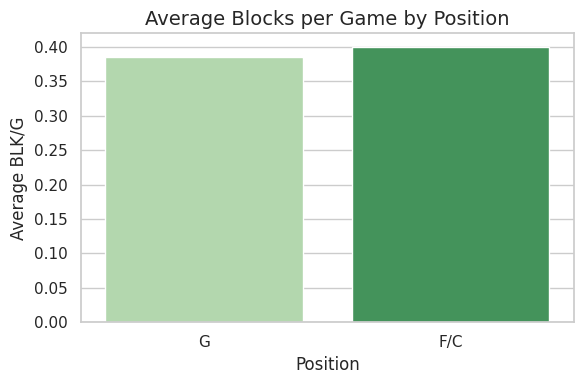

In [134]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='position', y='blocks_per_game', estimator='mean', ci=None, palette='Greens')

plt.title("Average Blocks per Game by Position", fontsize=14)
plt.xlabel("Position")
plt.ylabel("Average BLK/G")
plt.tight_layout()
plt.show()

### 📌 Insight:

- **F/C players** lead the team in blocks per game — most notably **Michaela Lane** and **Clearia Peterson**, who anchor interior defense.
- **Guards (G)** contribute minimally in this metric, which aligns with their perimeter-focused defensive responsibilities.

This highlights a clear defensive structure: rim protection from the frontcourt, with perimeter pressure and steals from the backcourt.

## 📈 Player Comparison: All-Around Performance Radar

This radar chart visualizes the well-rounded impact of key players across multiple metrics. It highlights scoring, efficiency, defense, and playmaking — offering a snapshot of each player's unique role and contributions.

ValueError: x and y must have same first dimension, but have shapes (8,) and (7,)

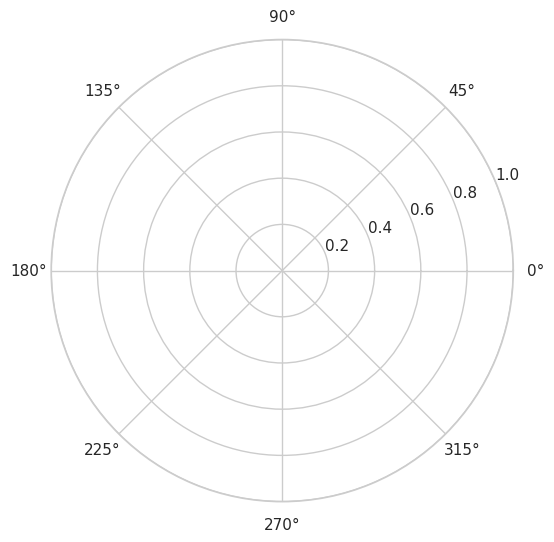

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Select players to compare
players = ['Clearia Peterson', 'Shameir Quimby', 'Kiara Harris']

# Step 2: Metrics to include
metrics = [
    'points_per_game',
    'rebounds_per_game',
    'assists_per_game',
    'steals_per_game',
    'blocks_per_game',
    'fg_pct'
]

# Step 3: Normalize metrics for fair comparison
radar_df = df[df['player_name'].isin(players)][['player_name'] + metrics].set_index('player_name')
radar_df = (radar_df - radar_df.min()) / (radar_df.max() - radar_df.min())

# Step 4: Radar chart setup
labels = metrics + [metrics[0]]  # Close the loop
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # Duplicate first angle to close circle

# Step 5: Initialize the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Step 6: Plot each player's values
for player in radar_df.index:
    values = radar_df.loc[player].tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, label=player)
    ax.fill(angles, values, alpha=0.1)

# Step 7: Style the chart
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
ax.set_title("All-Around Player Comparison", size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

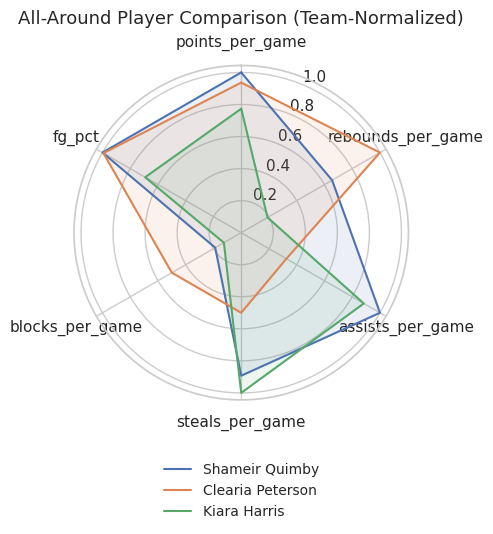

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Select players
players = ['Clearia Peterson', 'Shameir Quimby', 'Kiara Harris']

# Step 2: Metrics to compare
metrics = [
    'points_per_game',
    'rebounds_per_game',
    'assists_per_game',
    'steals_per_game',
    'blocks_per_game',
    'fg_pct'
]

# Step 3: Normalize across the entire team
team_min = df[metrics].min()
team_max = df[metrics].max()

radar_df = df[df['player_name'].isin(players)][['player_name'] + metrics].set_index('player_name')
radar_df = (radar_df - team_min) / (team_max - team_min)

# Step 4: Set up angles
num_vars = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # duplicate the first angle to close the loop

# Step 5: Radar chart setup
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Step 6: Plot each player
for player in radar_df.index:
    values = radar_df.loc[player].tolist()
    values += values[:1]  # duplicate first value to close the loop
    ax.plot(angles, values, label=player)
    ax.fill(angles, values, alpha=0.1)

# Step 7: Improved styling and layout
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), metrics)

# Clean title placement and font size
plt.title("All-Around Player Comparison (Team-Normalized)", fontsize=13, pad=30)

# Move legend outside, avoid overlapping
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1, fontsize=10, frameon=False)

plt.tight_layout(pad=2)
plt.show()

## 📊 Scoring Efficiency vs Volume: FG% vs Points per Game

This chart visualizes the relationship between a player's shot efficiency (FG%) and their scoring output (PPG). Players in the top-right quadrant are ideal: efficient, high-volume scorers who consistently convert opportunities.

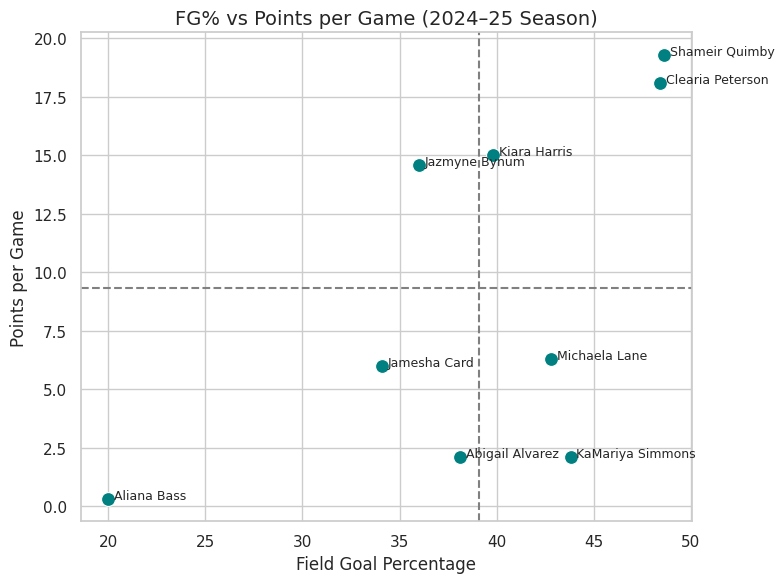

In [142]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='fg_pct', y='points_per_game', s=100, color='teal')

# Annotate each point
for i in range(df.shape[0]):
    plt.text(df['fg_pct'][i]+0.3, df['points_per_game'][i], df['player_name'][i], fontsize=9)

# Add average lines
plt.axhline(df['points_per_game'].mean(), linestyle='--', color='gray', label='Avg PPG')
plt.axvline(df['fg_pct'].mean(), linestyle='--', color='gray', label='Avg FG%')

plt.title("FG% vs Points per Game (2024–25 Season)", fontsize=14)
plt.xlabel("Field Goal Percentage")
plt.ylabel("Points per Game")
plt.grid(True)
plt.tight_layout()
plt.show()